In [45]:
! pip install tf-nightly

     |████████████████████████████████| 396.6MB 81kB/s 
     |████████████████████████████████| 450kB 35.4MB/s 
     |████████████████████████████████| 3.8MB 45.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=9fdf85942d00d35a2c6ce5eb1c736f3b62de21a1ba2f6b75894de37d963dfb46
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.2
    Uninstalling gast-0.3.2:
      Successfully uninstalled gast-0.3.2


## Import Modules

In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv2DTranspose

1.14.0


## Import MNIST Dataset

In [9]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


## Rescale & Train Dataset

In [10]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

X_train = X_train/255   # scale dataset
X_test = X_test/255     # scale dataset

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## Define the Model

In [11]:
model = Sequential()
# represent a 784-dimensional input in a 32-dimensional encoded version
model.add(Dense(32, input_dim=784, activation='relu')) 
model.add(Dense(784, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

In [12]:
# Use the mean squared error loss function, as the pixel values are continuous
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

# The input and output arrays are just the same—X_train
model.fit(X_train, X_train, validation_data=(X_test, X_test),epochs=10, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0691 - accuracy: 0.0057 - val_loss: 0.0493 - val_accuracy: 0.0080
Epoch 2/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0401 - accuracy: 0.0098 - val_loss: 0.0325 - val_accuracy: 0.0107
Epoch 3/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0295 - accuracy: 0.0097 - val_loss: 0.0259 - val_accuracy: 0.0104
Epoch 4/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0241 - accuracy: 0.0094 - val_loss: 0.0218 - val_accuracy: 0.0090
Epoch 5/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0211 - accuracy: 0.0098 - val_loss: 0.0197 - val_accuracy: 0.0106
Epoch 6/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0195 - accuracy: 0.0101 - val_loss: 0.0185 - val_accuracy: 0.0095
Epoch 7/10
60000/60000 [==============================] 

## Display first 4 reconstructed images
From here, we can see that the reconstructed images are blurred

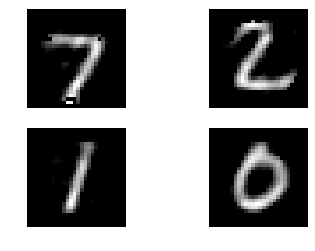

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(2,2,1)
plt.imshow(model.predict(X_test[0,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(model.predict(X_test[1,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(model.predict(X_test[2,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(model.predict(X_test[3,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

## First 4 test Actual Images

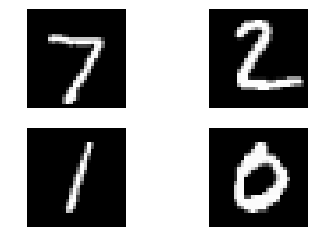

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(2,2,1)
plt.imshow((X_test[0,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow((X_test[1,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow((X_test[2,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow((X_test[3,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

# Multi-layer auto encoder

## Define the Model
our first hidden layer has 100 neurons, the second hidden layer (which is the embedded version of the image) is 32-dimensional, and the third hidden layer is 100-dimensional in shape.

In [15]:
model = Sequential()
model.add(Dense(100, input_dim=784, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(784, activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_8 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_9 (Dense)              (None, 784)               79184     
Total params: 164,216
Trainable params: 164,216
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

In [17]:
# Use the mean squared error loss function, as the pixel values are continuous
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# The input and output arrays are just the same—X_train
model.fit(X_train, X_train, validation_data=(X_test, X_test),epochs=25, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0154 - accuracy: 0.0124 - val_loss: 0.0135 - val_accuracy: 0.0127
Epoch 2/25
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0137 - accuracy: 0.0121 - val_loss: 0.0134 - val_accuracy: 0.0127
Epoch 3/25
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0137 - accuracy: 0.0123 - val_loss: 0.0134 - val_accuracy: 0.0131
Epoch 4/25
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0136 - accuracy: 0.0123 - val_loss: 0.0134 - val_accuracy: 0.0121
Epoch 5/25
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0136 - accuracy: 0.0124 - val_loss: 0.0133 - val_accuracy: 0.0132
Epoch 6/25
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0136 - accuracy: 0.0122 - val_loss: 0.0133 - val_accuracy: 0.0133
Epoch 7/25
60000/60000 [==============================] 

## Show first 4 processed Image

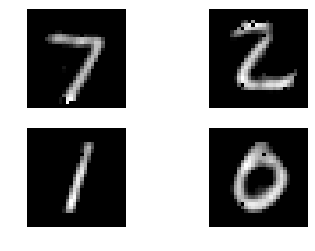

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(2,2,1)
plt.imshow(model.predict(X_test[0,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(model.predict(X_test[1,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(model.predict(X_test[2,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(model.predict(X_test[3,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

# Convolutional auto-encoder

## Load MNIST Dataset

In [22]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


## Reshape and scale the dataset
Notice the shape is different from Vanilla and Multi layer auto-encoder

In [23]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

X_train = X_train/255  # scaling
X_test = X_test/255    # scaling

print(X_train.shape)

(60000, 28, 28, 1)


## Define the Model
Reshape the input image so that it has a 32-dimensional embedded version in the middle of its architecture and finally upsample it so that we can reconstruct the image

In [29]:
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv2DTranspose

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28,1), activation='relu',padding='same',name='conv1'))
model.add(MaxPooling2D(pool_size=(2, 2), name='pool1'))
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu',padding='same', name='conv2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='pool2'))
model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu',padding='same', name='conv3'))
model.add(MaxPooling2D(pool_size=(2, 2),name='pool3'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding='same', name='conv4'))
model.add(MaxPooling2D(pool_size=(2, 2), name='pool4'))
model.add(Flatten(name='flatten'))
model.add(Reshape((1,1,32)))    # 32 dimensional image. Reshape: Reshapes an output to a certain shape

# Transposed convolution layer (sometimes called Deconvolution)
# kernel_size: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
model.add(Conv2DTranspose(filters=8,  kernel_size=(3,3), activation='relu')) 
model.add(Conv2DTranspose(filters=16, kernel_size=(5,5), activation='relu'))
model.add(Conv2DTranspose(filters=32, kernel_size=(8,8), activation='relu'))
model.add(Conv2DTranspose(filters=32, kernel_size=(15,15), activation='relu'))
model.add(Conv2D(1, (3, 3), activation='relu',padding='same'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 32)        320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 16)        4624      
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 7, 7, 16)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 7, 7, 8)           1160      
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 3, 3, 8)           0         
_________________________________________________________________
conv4 (Conv2D)               (None, 3, 3, 32)         

## Compile and Fit the Model

In [30]:
from tensorflow.keras.optimizers import Adam

adam = Adam(lr=0.001)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, X_train, validation_data=(X_test, X_test),epochs=10, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.0686 - val_loss: 0.0635
Epoch 2/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0620 - val_loss: 0.0564
Epoch 3/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0481 - val_loss: 0.0399
Epoch 4/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0370 - val_loss: 0.0326
Epoch 5/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0311 - val_loss: 0.0289
Epoch 6/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0281 - val_loss: 0.0273
Epoch 7/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0259 - val_loss: 0.0243
Epoch 8/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0240 - val_loss: 0.0228
Epoch 9/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.02

# Display first 4 encoded Images

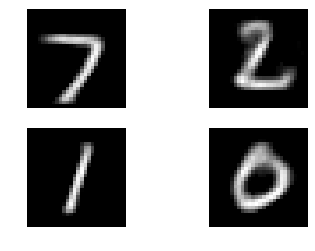

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(2,2,1)
plt.axis('off')
plt.imshow(model.predict(X_test[0,:,:,:].reshape(1,28,28,1)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(2,2,2)
plt.axis('off')
plt.imshow(model.predict(X_test[1,:,:,:].reshape(1,28,28,1)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(2,2,3)
plt.axis('off')
plt.imshow(model.predict(X_test[2,:,:,:].reshape(1,28,28,1)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(2,2,4)
plt.axis('off')
plt.imshow(model.predict(X_test[3,:,:,:].reshape(1,28,28,1)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()

# Grouping similar images

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(X_train.shape)
print(y_train.shape)

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
X_train = X_train/255
X_test = X_test/255

print(X_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(60000, 784)


In [3]:
model = Sequential()
model.add(Dense(32, input_dim=784, activation='relu'))
#model.add(Dense(32,activation='relu'))
model.add(Dense(784, activation='relu'))
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.fit(X_train, X_train, validation_data=(X_test, X_test),epochs=10, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0681 - acc: 0.0105 - val_loss: 0.0479 - val_acc: 0.0096
Epoch 2/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0384 - acc: 0.0113 - val_loss: 0.0309 - val_acc: 0.0131
Epoch 3/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0277 - acc: 0.0116 - val_loss: 0.0242 - val_acc: 0.0114
Epoch 4/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0225 - acc: 0.0105 - val_loss: 0.0204 - val_acc: 0.0112
Epoch 5/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0193 - acc: 0.0108 - val_loss: 0.0178 - val_acc: 0.0106
Epoch 6/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0174 - acc: 0.0118 - val_loss: 0.0164 - val_acc: 0.0114
Epoch 7/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0163 - acc: 0.0123 - val_loss: 0.

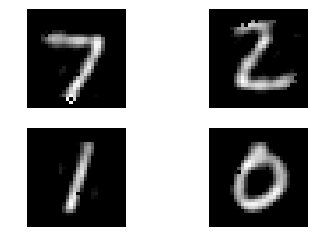

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(2,2,1)
plt.imshow(model.predict(X_test[0,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(model.predict(X_test[1,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(model.predict(X_test[2,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(model.predict(X_test[3,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

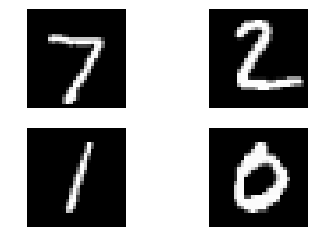

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(221)
plt.imshow((X_test[0,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(222)
plt.imshow((X_test[1,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(223)
plt.imshow((X_test[2,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(224)
plt.imshow((X_test[3,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

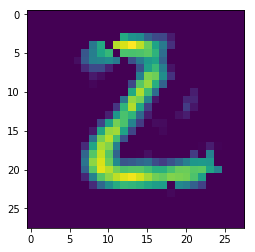

In [16]:
img = model.predict(X_test[1,:].reshape(1,784)).reshape(28,28)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img)

In [5]:
!pip install bokeh

In [0]:
from tensorflow.keras import Model
layer_name = 'dense_1'
intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer(layer_name).output)

In [0]:
intermediate_output = intermediate_layer_model.predict(X_test)

In [9]:
intermediate_output.shape

(10000, 784)

In [0]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

In [0]:
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 10000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

In [12]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_img_label = tsne_model.fit_transform(intermediate_output)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.396s...
[t-SNE] Computed neighbors for 10000 samples in 174.595s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.613188
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.288925
[t-SNE] KL divergence after 1000 iterations: 1.760646


ValueError: ignored

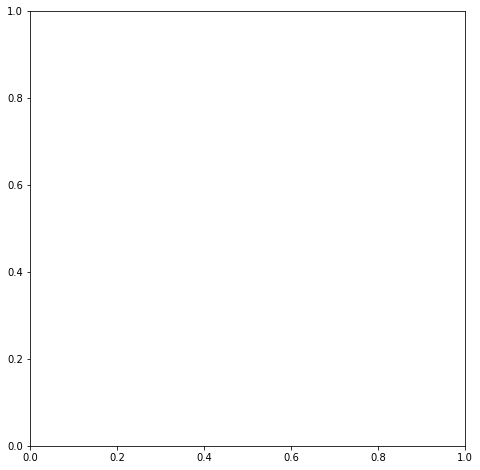

In [36]:
#Import numpy
import numpy as np

#Import scikitlearn for machine learning functionalities
import sklearn
from sklearn.manifold import TSNE 
from sklearn.datasets import load_digits # For the UCI ML handwritten digits dataset

# Import matplotlib for plotting graphs ans seaborn for attractive graphics.
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
%matplotlib inline

import seaborn as sb

def plot(x, colors):
  
    palette = np.array(sb.color_palette("hls", 10))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts
  

plot(tsne_img_label,Y)

In [0]:
import pandas as pd
import numpy as np
tsne_df = pd.DataFrame(tsne_img_label, columns=['x', 'y'])
tsne_df['image_label'] = y_test